# Continuous Control


### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

**Note:** For this project, only the single-agent version of the environment was used.


In [1]:
from collections import deque
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
from unityagents import UnityEnvironment

from ddpg_agent import Agent
%matplotlib inline

Using this device: cuda:0


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='D:/Documents/GitHub/drlnd3/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Initialize Agent

In [5]:
AGENT_SEED = 1779661
STATE_SIZE = 29
ACTION_SIZE = 4

agent = Agent(state_size=STATE_SIZE, action_size=ACTION_SIZE, random_seed=AGENT_SEED)

In [6]:
# useful as some of the state dimensions have been observed to carry no useful information
def preprocess_state(state):
    state = np.delete(state, 31, 1)
    state = np.delete(state, 30, 1)
    state = np.delete(state, 29, 1)
    state = np.delete(state, 27, 1)
    return state

### 4. Train Agent

d:\documents\github\drlnd3\env\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 25	Average Score: 0.28959999	Score: 1.35
Episode 50	Average Score: 0.50959999	Score: 0.88
Episode 75	Average Score: 0.60613332	Score: 0.87
Episode 100	Average Score: 0.65989999	Score: 0.36
Episode 125	Average Score: 0.74319998	Score: 0.37
Episode 150	Average Score: 0.71369998	Score: 0.20
Episode 175	Average Score: 0.66039999	Score: 0.27
Episode 200	Average Score: 0.66479999	Score: 2.47
Episode 225	Average Score: 0.69639998	Score: 0.59
Episode 250	Average Score: 0.84209998	Score: 0.25
Episode 275	Average Score: 0.91699998	Score: 0.67
Episode 300	Average Score: 0.84859998	Score: 1.10
Episode 325	Average Score: 0.78199998	Score: 1.49
Episode 350	Average Score: 0.65769999	Score: 1.69
Episode 375	Average Score: 0.57349999	Score: 0.57
Episode 400	Average Score: 0.56399999	Score: 1.65
Episode 425	Average Score: 0.54279999	Score: 0.19
Episode 450	Average Score: 0.49019999	Score: 0.28
Episode 475	Average Score: 0.54549999	Score: 1.04
Episode 500	Average Score: 0.58589999	Score: 0.08
Epi

Episode 7925	Average Score: 16.35699963	Score: 16.96
Episode 7950	Average Score: 16.06129964	Score: 21.60
Episode 7975	Average Score: 16.11799964	Score: 3.742
Episode 8000	Average Score: 15.79809965	Score: 15.02
Episode 8025	Average Score: 16.50269963	Score: 22.39
Episode 8050	Average Score: 16.38779963	Score: 14.46
Episode 8075	Average Score: 16.65259963	Score: 20.06
Episode 8100	Average Score: 15.92799964	Score: 12.26
Episode 8125	Average Score: 15.80889965	Score: 24.60
Episode 8150	Average Score: 15.50469965	Score: 6.638
Episode 8175	Average Score: 15.52629965	Score: 13.66
Episode 8200	Average Score: 15.65329965	Score: 18.92
Episode 8225	Average Score: 14.95999967	Score: 38.69
Episode 8250	Average Score: 14.56209967	Score: 9.266
Episode 8275	Average Score: 13.64309970	Score: 11.65
Episode 8300	Average Score: 14.55889967	Score: 13.05
Episode 8325	Average Score: 14.73219967	Score: 14.19
Episode 8350	Average Score: 14.94689967	Score: 24.94
Episode 8375	Average Score: 16.00449964	Score:

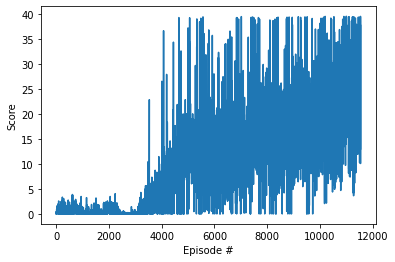

In [9]:
def ddpg():
    scores_deque = deque(maxlen=100)
    scores = []
    i_episode = 0
    while True:
        i_episode += 1
        use_train_mode = i_episode % 400 != 0                            # visualize every 400th episode
        env_info = env.reset(train_mode=use_train_mode)[brain_name]      # reset the environment
        state = preprocess_state(env_info.vector_observations)           # get the current state
        score = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]                      # send action to the environment
            next_state = preprocess_state(env_info.vector_observations)  # get next state
            reward = env_info.rewards[0]                                 # get reward
            done = env_info.local_done[0]                                # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.8f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 25 == 0:
            torch.save(agent.actor_local.state_dict(), f'checkpoint_actor_{i_episode}.pth')
            torch.save(agent.critic_local.state_dict(), f'checkpoint_critic_{i_episode}.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if sum(scores_deque) / len(scores_deque) >= 30:
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')

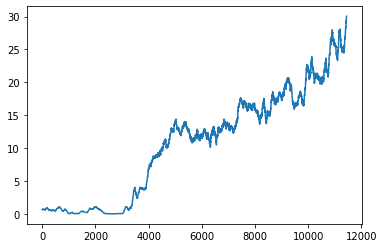

In [16]:
rolling_avg = np.convolve(scores, np.ones(100), 'valid') / 100

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(rolling_avg)
plt.show()

### 5. Load and Watch Agent

In [20]:
agent = Agent(state_size=STATE_SIZE, action_size=ACTION_SIZE, random_seed=AGENT_SEED)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_final.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_final.pth'))
agent.actor_local.eval()
agent.critic_local.eval()

Critic(
  (fcs1): Linear(in_features=29, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

In [23]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
state = preprocess_state(env_info.vector_observations) # get the current state (for each agent)
score = 0                                              # initialize the score (for each agent)
while True:
    action = agent.act(state)
    action = np.clip(action, -1, 1)                    # all actions between -1 and 1
    env_info = env.step(action)[brain_name]            # send all actions to tne environment
    next_state = preprocess_state(                     # get next state (for each agent)
        env_info.vector_observations
    )
    reward = env_info.rewards[0]                       # get reward (for each agent)
    done = env_info.local_done                         # see if episode finished

    state = next_state                                 # roll over states to next time step
    score += reward                                    # update the score (for each agent)
    if np.any(done):                                   # exit loop if episode finished
        break
        
print(score)


38.48999913968146


### 6. Close the Environment

In [24]:
env.close()